In [1]:
import sql_tools
import pandas as pd

In [2]:
cnx, cursor = sql_tools.create_session_cursor()
result = sql_tools.execute_fetchall(cursor, 'SELECT * from food where RESTAURANT_ID=%s;', [2])
result = pd.DataFrame(result)
result


,0,1,2,3,4,5,6
0,11,2,荤菜,葱香烤鸡,35.0,1,94
1,12,2,荤菜,酱爆石锅蛙,58.0,1,91
2,13,2,荤菜,卤制烤鸭,45.0,1,49
3,14,2,荤菜,粉丝裹虾,49.0,1,101
4,15,2,荤菜,盐菜扣肉,38.0,1,74
5,16,2,荤菜,鲜花椒鲈鱼,56.0,1,92
6,17,2,素菜,香锅卷心菜,25.0,1,104
7,18,2,素菜,油淋菜心,18.0,1,110
8,19,2,素菜,香锅花菜,28.0,1,75
9,20,2,汤,石锅鸡汤豆腐,32.0,1,64


In [3]:
Order = Order = sql_tools.execute_fetchall(cursor, 'SELECT * from `order` where RESTAURANT_ID=%s;', [2])
Order = pd.DataFrame(Order)
Order.head()
# len(Order)

,0,1,2,3,4
0,601,2,101,2023-03-10 17:18:29,11
1,602,2,102,2023-03-15 19:20:47,12
2,603,2,103,2023-03-14 13:29:26,8
3,604,2,104,2023-03-10 17:09:17,13
4,605,2,105,2023-03-04 18:01:27,15


In [4]:
#支持度=购买了A和B商品（集合G）的人数/所有购买过商品（集合U）的人数
#Formula:   Support = The number of order inlude dish A and B / The number of orders in the restaurant

#Restaurant 1
Order_detail = sql_tools.execute_fetchall(cursor, 'SELECT * from `order` where RESTAURANT_ID=1', tuple())
Order_detail = pd.DataFrame(Order_detail)

Order_num=len(Order_detail.index)
Order_num


600

In [12]:
import numpy as np

def _get_support_matrix(id):
    cnx, cursor = sql_tools.create_session_cursor()
    food = sql_tools.execute_fetchall(cursor, 'SELECT * from food where RESTAURANT_ID=%s;', [id])
    food = pd.DataFrame(food)
    Food_num = len(food)

    Order = sql_tools.execute_fetchall(cursor, 'SELECT * from `order` where RESTAURANT_ID=%s;', [id])
    Order = pd.DataFrame(Order)

    Order_detail = sql_tools.execute_fetchall(cursor, 'SELECT * from `order` where RESTAURANT_ID=%s', [id])
    Order_detail = pd.DataFrame(Order_detail)

    Order_num=len(Order_detail)

    Dish_Relation= pd.DataFrame(np.zeros((Food_num, Food_num)),
                                columns=food[0], index=food[0])

    Order_detail = sql_tools.execute_fetchall(cursor, 'SELECT * from order_details', tuple())
    Order_detail = pd.DataFrame(Order_detail)

    for i in Order[0]:
        Temp = Order_detail.loc[ Order_detail[0] == i ]
        # Temp = pd.DataFrame(Temp)
        for j in Temp[1].tolist():
            for k in Temp[1].tolist():
                Dish_Relation.loc[j, k] += 1

    cnx.close()
    return Dish_Relation / Order_num, food

Dish_Relation = _get_support_matrix(3)

Support_Matrix, food = Dish_Relation
Support_Matrix

,21,22,23,24,25,26,27,28,29,30
0,,,,,,,,,,
21,0.818333,0.555000,0.526667,0.420000,0.323333,0.508333,0.405000,0.648333,0.636667,0.488333
22,0.555000,0.660000,0.438333,0.348333,0.261667,0.396667,0.321667,0.525000,0.525000,0.400000
23,0.526667,0.438333,0.636667,0.331667,0.235000,0.401667,0.316667,0.498333,0.505000,0.366667
24,0.420000,0.348333,0.331667,0.516667,0.183333,0.305000,0.265000,0.398333,0.388333,0.313333
25,0.323333,0.261667,0.235000,0.183333,0.390000,0.241667,0.198333,0.306667,0.313333,0.225000
26,0.508333,0.396667,0.401667,0.305000,0.241667,0.620000,0.285000,0.501667,0.470000,0.350000
27,0.405000,0.321667,0.316667,0.265000,0.198333,0.285000,0.498333,0.391667,0.393333,0.301667
28,0.648333,0.525000,0.498333,0.398333,0.306667,0.501667,0.391667,0.798333,0.611667,0.465000
29,0.636667,0.525000,0.505000,0.388333,0.313333,0.470000,0.393333,0.611667,0.778333,0.471667


['果木烤鸭', '糖醋里脊', '叫花鸡', '毛血旺', '香锅牛杂', '粉丝包菜', '香锅土豆片', '腐竹鸡毛菜', '鸭汤', '鸽子汤']


(array([-0.5       ,  0.61111111,  1.72222222,  2.83333333,  3.94444444,
         5.05555556,  6.16666667,  7.27777778,  8.38888889,  9.5       ]),
 [Text(0, -0.5, '果木烤鸭'),
  Text(0, 0.6111111111111112, '糖醋里脊'),
  Text(0, 1.7222222222222223, '叫花鸡'),
  Text(0, 2.8333333333333335, '毛血旺'),
  Text(0, 3.9444444444444446, '香锅牛杂'),
  Text(0, 5.055555555555555, '粉丝包菜'),
  Text(0, 6.166666666666667, '香锅土豆片'),
  Text(0, 7.277777777777779, '腐竹鸡毛菜'),
  Text(0, 8.38888888888889, '鸭汤'),
  Text(0, 9.5, '鸽子汤')])

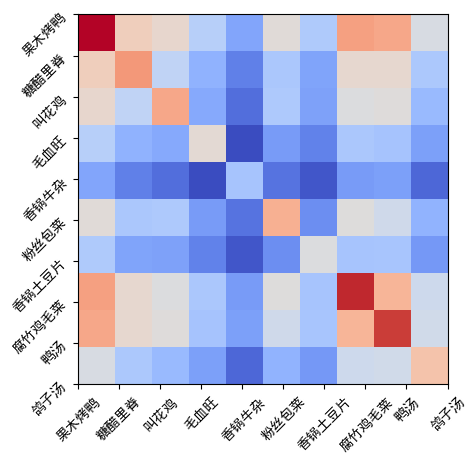

In [28]:
from matplotlib import pyplot as plt 
from matplotlib import ticker

plt.rcParams['font.sans-serif']=['SimHei'] 

fig, ax = plt.subplots()
ax.imshow(Support_Matrix, cmap='coolwarm')
print(food[3].tolist())
# plt.xlabel(food[3].tolist())
# plt.ylabel(food[3].tolist())
ax.xaxis.set_major_locator(
    ticker.LinearLocator(len(food))
)
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: food[3].tolist()[pos])
)
plt.xticks(rotation=45)

ax.yaxis.set_major_locator(
    ticker.LinearLocator(len(food))
)
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: food[3].tolist()[pos])
)
plt.yticks(rotation=45)



In [30]:
def _get_combinations(Support_Matrix, id):
    idx, idy = np.where(Support_Matrix>0.6)
    combs = set()
    for i in range(len(idx)):
        if idx[i] != idy[i]:
            combs.add((min(idx[i], idy[i]), max(idx[i], idy[i])))
    print(combs)

    combs = list(combs)
    cnx, cursor = sql_tools.create_session_cursor()
    food = sql_tools.execute_fetchall(cursor, 'SELECT * from food where RESTAURANT_ID=%s;', [id])
    cnx.close()
    food = pd.DataFrame(food)
    food.index = food[0]
    # print(food)
    result = []
    for comb in combs:
        dishname1 = food.iloc[comb[0], 3]
        dishname2 = food.iloc[comb[1], 3]
        Support_Index = Support_Matrix.iloc[comb[0], comb[1]]
        result.append((dishname1, dishname2, Support_Index))
    return result
list(zip(*_get_combinations(Support_Matrix, 3)))

{(0, 7), (0, 8), (7, 8)}


[('果木烤鸭', '果木烤鸭', '腐竹鸡毛菜'),
 ('腐竹鸡毛菜', '鸭汤', '鸭汤'),
 (0.6483333333333333, 0.6366666666666667, 0.6116666666666667)]

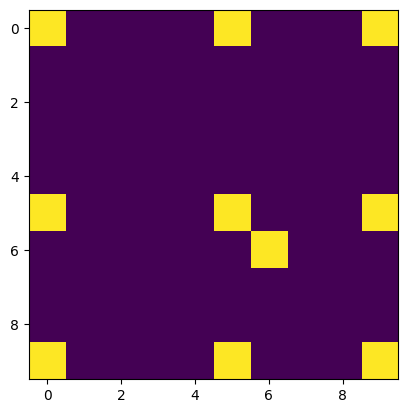

In [12]:
plt.imshow(np.where(Support_Matrix>0.6, 1, 0))

In [827]:
#满足比如支持度>0.6，置信度>0.6的这些商品组合才可以认为是有关联的，值得推荐的
#支持度>0.6:
#Dish 1 and Dish 6
#Dish 1 and Dish 10
#Dish 6 and Dish 10

In [828]:
#置信度=购买了A和B商品（集合G）的人数/购买了A商品（集合A）的人数
#Confidence of A = The number of order inlude dish A and B / The number of order include dish A

Confidence_A =  Dish_Relation[0][5] / Order_Count[0]
Confidence_B =  Dish_Relation[0][5] / Order_Count[5]

#Confidence_A = 0.7814432989690722
#Confidence_B = 0.7962184873949579
#Dish 1 and Dish 6 is recommended

In [829]:
Confidence_A =  Dish_Relation[0][9] / Order_Count[0]
Confidence_B =  Dish_Relation[0][9] / Order_Count[9]

#Confidence_A = 0.8474226804123711
#Confidence_B = 0.8170974155069582
#Dish 1 and Dish 10 is recommended

In [830]:
Confidence_A =  Dish_Relation[5][9] / Order_Count[5]
Confidence_B =  Dish_Relation[5][9] / Order_Count[9]

#Confidence_A = 0.8445378151260504
#Confidence_B = 0.7992047713717694
#Dish 6 and Dish 10 is recommended

In [831]:
#Restaurant 2
Order_detail = sql_tools.execute_fetchall(cursor, 'SELECT * from `order` where RESTAURANT_ID=2', tuple())
Order_detail = pd.DataFrame(Order_detail)

Order_num=len(Order_detail.index)
Order_num

600

In [832]:
import numpy as np
Dish_Relation= np.zeros((10, 10))
Order_Count = np.zeros(10)
for i in range(601,1201):
    Temp = sql_tools.execute_fetchall(cursor, 'SELECT * from order_details where ORDER_ID=%s', tuple([i]))
    Temp = pd.DataFrame(Temp)
    for j in Temp[1].tolist():
        Order_Count[(j-1)%10] += 1
        for k in Temp[1].tolist():
            Dish_Relation[(j-1)%10][(k-1)%10]+=1

    

In [833]:
Support_Matrix = Dish_Relation / Order_num
Support_Matrix

array([[0.51166667, 0.34833333, 0.30333333, 0.40333333, 0.20666667,
        0.215     , 0.36      , 0.45      , 0.28166667, 0.35      ],
       [0.34833333, 0.69666667, 0.415     , 0.54333333, 0.26833333,
        0.26166667, 0.51      , 0.62666667, 0.37666667, 0.47333333],
       [0.30333333, 0.415     , 0.605     , 0.48666667, 0.23166667,
        0.22666667, 0.41833333, 0.54833333, 0.32666667, 0.4       ],
       [0.40333333, 0.54333333, 0.48666667, 0.785     , 0.29833333,
        0.31333333, 0.53833333, 0.71166667, 0.41      , 0.54333333],
       [0.20666667, 0.26833333, 0.23166667, 0.29833333, 0.38666667,
        0.15666667, 0.27      , 0.34166667, 0.21      , 0.25333333],
       [0.215     , 0.26166667, 0.22666667, 0.31333333, 0.15666667,
        0.40166667, 0.29666667, 0.35833333, 0.225     , 0.27833333],
       [0.36      , 0.51      , 0.41833333, 0.53833333, 0.27      ,
        0.29666667, 0.695     , 0.63333333, 0.38333333, 0.48166667],
       [0.45      , 0.62666667, 0.5483333

In [834]:
#满足比如支持度>0.6，置信度>0.6的这些商品组合才可以认为是有关联的，值得推荐的
#支持度>0.6:
#Dish 2 and Dish 8
#Dish 4 and Dish 8
#Dish 7 and Dish 8
#Dish 8 and Dish 10

In [835]:
Confidence_A =  Dish_Relation[1][7] / Order_Count[1]
Confidence_B =  Dish_Relation[1][7] / Order_Count[7]


#Confidence_A = 0.8995215311004785
#Confidence_B = 0.6937269372693727
#Dish 2 and Dish 8 is recommended

In [836]:
Confidence_A =  Dish_Relation[3][7] / Order_Count[3]
Confidence_B =  Dish_Relation[3][7] / Order_Count[7]

#Confidence_A = 0.9065817409766455
#Confidence_B = 0.7878228782287823
#Dish 4 and Dish 8 is recommended

In [837]:
Confidence_A =  Dish_Relation[6][7] / Order_Count[6]
Confidence_B =  Dish_Relation[6][7] / Order_Count[7]

#Confidence_A = 0.9112709832134293
#Confidence_B = 0.7011070110701108
#Dish 7 and Dish 8 is recommended

In [838]:
Confidence_A =  Dish_Relation[7][9] / Order_Count[7]
Confidence_B =  Dish_Relation[7][9] / Order_Count[9]

#Confidence_A = 0.6845018450184502
#Confidence_B = 0.9115479115479116
#Dish 8 and Dish 10 is recommended

In [839]:
#Restaurant 3
Order_detail = sql_tools.execute_fetchall(cursor, 'SELECT * from `order` where RESTAURANT_ID=3', tuple())
Order_detail = pd.DataFrame(Order_detail)

Order_num=len(Order_detail.index)
Order_num

600

In [840]:
import numpy as np
Dish_Relation= np.zeros((10, 10))
Order_Count = np.zeros(10)
for i in range(1201,1801):
    Temp = sql_tools.execute_fetchall(cursor, 'SELECT * from order_details where ORDER_ID=%s', tuple([i]))
    Temp = pd.DataFrame(Temp)
    for j in Temp[1].tolist():
        Order_Count[(j-1)%10] += 1
        for k in Temp[1].tolist():
            Dish_Relation[(j-1)%10][(k-1)%10]+=1

In [841]:
Support_Matrix = Dish_Relation / Order_num
Support_Matrix

array([[0.81833333, 0.555     , 0.52666667, 0.42      , 0.32333333,
        0.50833333, 0.405     , 0.64833333, 0.63666667, 0.48833333],
       [0.555     , 0.66      , 0.43833333, 0.34833333, 0.26166667,
        0.39666667, 0.32166667, 0.525     , 0.525     , 0.4       ],
       [0.52666667, 0.43833333, 0.63666667, 0.33166667, 0.235     ,
        0.40166667, 0.31666667, 0.49833333, 0.505     , 0.36666667],
       [0.42      , 0.34833333, 0.33166667, 0.51666667, 0.18333333,
        0.305     , 0.265     , 0.39833333, 0.38833333, 0.31333333],
       [0.32333333, 0.26166667, 0.235     , 0.18333333, 0.39      ,
        0.24166667, 0.19833333, 0.30666667, 0.31333333, 0.225     ],
       [0.50833333, 0.39666667, 0.40166667, 0.305     , 0.24166667,
        0.62      , 0.285     , 0.50166667, 0.47      , 0.35      ],
       [0.405     , 0.32166667, 0.31666667, 0.265     , 0.19833333,
        0.285     , 0.49833333, 0.39166667, 0.39333333, 0.30166667],
       [0.64833333, 0.525     , 0.4983333

In [842]:
#满足比如支持度>0.6，置信度>0.6的这些商品组合才可以认为是有关联的，值得推荐的
#支持度>0.6:
#Dish 1 and Dish 8
#Dish 1 and Dish 9
#Dish 8 and Dish 9

In [843]:
Confidence_A =  Dish_Relation[0][7] / Order_Count[0]
Confidence_B =  Dish_Relation[0][7] / Order_Count[7]

#Confidence_A = 0.7922606924643585
#Confidence_B = 0.8121085594989561
#Dish 1 and Dish 8 is recommended

In [844]:
Confidence_A =  Dish_Relation[0][8] / Order_Count[0]
Confidence_B =  Dish_Relation[0][8] / Order_Count[8]

#Confidence_A = 0.7780040733197556
#Confidence_B = 0.8179871520342612
#Dish 1 and Dish 9 is recommended

In [845]:
Confidence_A =  Dish_Relation[7][8] / Order_Count[7]
Confidence_B =  Dish_Relation[7][8] / Order_Count[8]

#Confidence_A = 0.7661795407098121
#Confidence_B = 0.7858672376873662
#Dish 8 and Dish 9 is recommended

In [846]:
#Restaurant 4
Order_detail = sql_tools.execute_fetchall(cursor, 'SELECT * from `order` where RESTAURANT_ID=4', tuple())
Order_detail = pd.DataFrame(Order_detail)

Order_num=len(Order_detail.index)
Order_num

600

In [847]:
import numpy as np
Dish_Relation= np.zeros((10, 10))
Order_Count = np.zeros(10)
for i in range(1801,2401):
    Temp = sql_tools.execute_fetchall(cursor, 'SELECT * from order_details where ORDER_ID=%s', tuple([i]))
    Temp = pd.DataFrame(Temp)
    for j in Temp[1].tolist():
        Order_Count[(j-1)%10] += 1
        for k in Temp[1].tolist():
            Dish_Relation[(j-1)%10][(k-1)%10]+=1

In [848]:
Support_Matrix = Dish_Relation / Order_num
Support_Matrix

array([[0.6       , 0.46833333, 0.38333333, 0.44      , 0.27666667,
        0.33      , 0.405     , 0.35666667, 0.46      , 0.30333333],
       [0.46833333, 0.78333333, 0.475     , 0.57333333, 0.375     ,
        0.39833333, 0.54      , 0.505     , 0.61666667, 0.40666667],
       [0.38333333, 0.475     , 0.62666667, 0.44833333, 0.29833333,
        0.315     , 0.43666667, 0.37833333, 0.47833333, 0.315     ],
       [0.44      , 0.57333333, 0.44833333, 0.72      , 0.325     ,
        0.36666667, 0.49666667, 0.44833333, 0.55166667, 0.35833333],
       [0.27666667, 0.375     , 0.29833333, 0.325     , 0.48166667,
        0.245     , 0.32333333, 0.29833333, 0.37666667, 0.26166667],
       [0.33      , 0.39833333, 0.315     , 0.36666667, 0.245     ,
        0.49833333, 0.35166667, 0.33      , 0.40166667, 0.24166667],
       [0.405     , 0.54      , 0.43666667, 0.49666667, 0.32333333,
        0.35166667, 0.695     , 0.455     , 0.54666667, 0.36333333],
       [0.35666667, 0.505     , 0.3783333

In [849]:
#满足比如支持度>0.6，置信度>0.6的这些商品组合才可以认为是有关联的，值得推荐的
#支持度>0.6:
#Dish 2 and Dish 9

In [850]:
Confidence_A =  Dish_Relation[1][8] / Order_Count[1]
Confidence_B =  Dish_Relation[1][8] / Order_Count[8]

#Confidence_A = 0.7872340425531915
#Confidence_B = 0.7939914163090128
#Dish 2 and Dish 9 is recommended

In [851]:
#Restaurant 5
Order_detail = sql_tools.execute_fetchall(cursor, 'SELECT * from `order` where RESTAURANT_ID=5', tuple())
Order_detail = pd.DataFrame(Order_detail)

Order_num=len(Order_detail.index)
Order_num

600

In [852]:
import numpy as np
Dish_Relation= np.zeros((10, 10))
Order_Count = np.zeros(10)
for i in range(2401,3001):
    Temp = sql_tools.execute_fetchall(cursor, 'SELECT * from order_details where ORDER_ID=%s', tuple([i]))
    Temp = pd.DataFrame(Temp)
    for j in Temp[1].tolist():
        Order_Count[(j-1)%10] += 1
        for k in Temp[1].tolist():
            Dish_Relation[(j-1)%10][(k-1)%10]+=1

In [853]:
Support_Matrix = Dish_Relation / Order_num
Support_Matrix

array([[0.77166667, 0.455     , 0.555     , 0.44833333, 0.465     ,
        0.49833333, 0.62      , 0.48833333, 0.27      , 0.45666667],
       [0.455     , 0.61      , 0.425     , 0.36      , 0.35833333,
        0.375     , 0.48666667, 0.38833333, 0.21833333, 0.36      ],
       [0.555     , 0.425     , 0.72166667, 0.425     , 0.43666667,
        0.45      , 0.57833333, 0.45333333, 0.25666667, 0.40833333],
       [0.44833333, 0.36      , 0.425     , 0.585     , 0.345     ,
        0.34833333, 0.45833333, 0.37      , 0.215     , 0.33333333],
       [0.465     , 0.35833333, 0.43666667, 0.345     , 0.59833333,
        0.35833333, 0.47833333, 0.36666667, 0.21833333, 0.35      ],
       [0.49833333, 0.375     , 0.45      , 0.34833333, 0.35833333,
        0.61833333, 0.50166667, 0.38833333, 0.24333333, 0.37833333],
       [0.62      , 0.48666667, 0.57833333, 0.45833333, 0.47833333,
        0.50166667, 0.80166667, 0.49666667, 0.28333333, 0.45666667],
       [0.48833333, 0.38833333, 0.4533333

In [854]:
#满足比如支持度>0.6，置信度>0.6的这些商品组合才可以认为是有关联的，值得推荐的
#支持度>0.6:
#Dish 1 and Dish 7

In [855]:
Confidence_A =  Dish_Relation[0][6] / Order_Count[0]
Confidence_B =  Dish_Relation[0][6] / Order_Count[6]

#Confidence_A = 0.8034557235421166
#Confidence_B = 0.7733887733887734
#Dish 1 and Dish 7 is recommended